In [1]:
!pip install -q tensorflow==2.16.1 numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.16.1 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.16.1 which is incompatible.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array


In [11]:
# Define image dimensions and batch size (adjust as needed based on your images)
img_height = 180
img_width = 180
batch_size = 6

# Adjust these paths if your TRAIN and TEST folders are in a specific directory, e.g., '/kaggle/input/your-dataset-name/TRAIN'
train_dir = '/kaggle/input/waste-classification-data/DATASET/TRAIN/'
test_dir = '/kaggle/input/waste-classification-data/DATASET/TEST/'

In [12]:
# Load training dataset
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'  # Binary classification for two classes
)

# Load test dataset (used for validation/evaluation)
test_ds = image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

# Get class names (should be ['O', 'R'] sorted alphabetically)
class_names = train_ds.class_names
print(f"Class names: {class_names}")

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.
Class names: ['O', 'R']


In [13]:
# Build the CNN model
model = Sequential([
    Rescaling(1./255),  # Normalize pixel values
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Train the model
epochs = 5  # Adjust epochs as needed
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)


Epoch 1/5
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 568s 151ms/step - accuracy: 0.7755 - loss: 0.4866 - val_accuracy: 0.8695 - val_loss: 0.3586
Epoch 2/5
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 561s 149ms/step - accuracy: 0.8329 - loss: 0.3894 - val_accuracy: 0.8786 - val_loss: 0.3220
Epoch 3/5
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 554s 147ms/step - accuracy: 0.8580 - loss: 0.3429 - val_accuracy: 0.8918 - val_loss: 0.3216
Epoch 4/5
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 548s 146ms/step - accuracy: 0.8771 - loss: 0.3077 - val_accuracy: 0.9049 - val_loss: 0.3108
Epoch 5/5
3761/3761 ━━━━━━━━━━━━━━━━━━━━ 560s 149ms/step - accuracy: 0.8873 - loss: 0.2670 - val_accuracy: 0.8782 - val_loss: 0.3987


In [18]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

# Save the model weights (saved in /kaggle/working/ by default in Kaggle)
weights_path = 'my_model_weights.weights.h5'
model.save_weights(weights_path)
print(f"Weights saved to: {weights_path}")

419/419 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8818 - loss: 0.4012
Test accuracy: 0.8782331943511963
Weights saved to: my_model_weights.weights.h5


Weights loaded successfully!


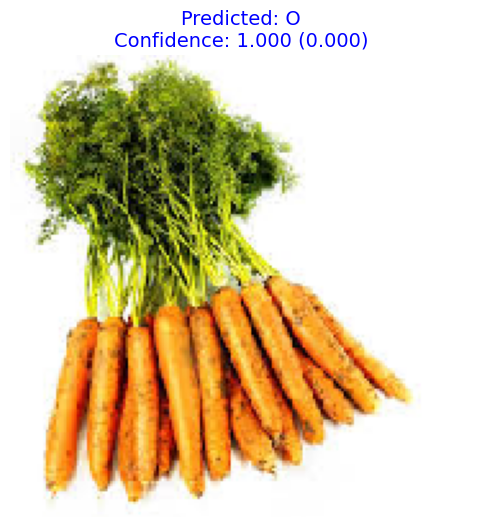

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# === 1. Re-create the exact model architecture ===
model_pred = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# === 2. BUILD THE MODEL (Fixes the ValueError) ===
model_pred.build((None, 180, 180, 3))

# === 3. Load saved weights ===
weights_path = '/kaggle/working/my_model_weights.weights.h5'
model_pred.load_weights(weights_path)
print("Weights loaded successfully!")

# === 4. Load and preprocess new image ===
new_img_path = '/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12595.jpg'  # CHANGE THIS PATH

# Load image for prediction
img = load_img(new_img_path, target_size=(180, 180))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape: (1, 180, 180, 3)

# === 5. Make prediction ===
prob = model_pred.predict(img_array, verbose=0)[0][0]

# Define class names (MUST match folder order: alphabetical)
class_names = ['O', 'R']  # ['O', 'R'] if O comes before R in folder list

pred_class = class_names[1] if prob > 0.5 else class_names[0]
confidence = prob if prob > 0.5 else 1 - prob

# === 6. DISPLAY IMAGE + PREDICTION ===
plt.figure(figsize=(6, 6))
plt.imshow(img)  # img is already PIL Image
plt.axis('off')
plt.title(
    f"Predicted: {pred_class}\n"
    f"Confidence: {confidence:.3f} ({prob:.3f})",
    fontsize=14, color='green' if pred_class == class_names[1] else 'blue'
)
plt.show()